In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Set style
plt.style.use('seaborn-notebook')
plt.rcParams['axes.facecolor'] = 'lightblue'

In [3]:
# Load and clean data
df=pd.read_excel('covidworldometer.xlsx')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sort_values(by='country', inplace=True)

In [5]:
# Load basemap
world = gpd.read_file('naturalearth_lowres')

In [6]:
# Optimize projection
world=world.to_crs(epsg=3857)

In [7]:
# Clean data
world=world[(world['continent'] != 'Antarctica')]
world=world[(world['name'] != 'Greenland')]
world.sort_values(by='name', inplace=True)

In [8]:
# Merge map and data
table=world.merge(df, right_on='country', left_on='name')

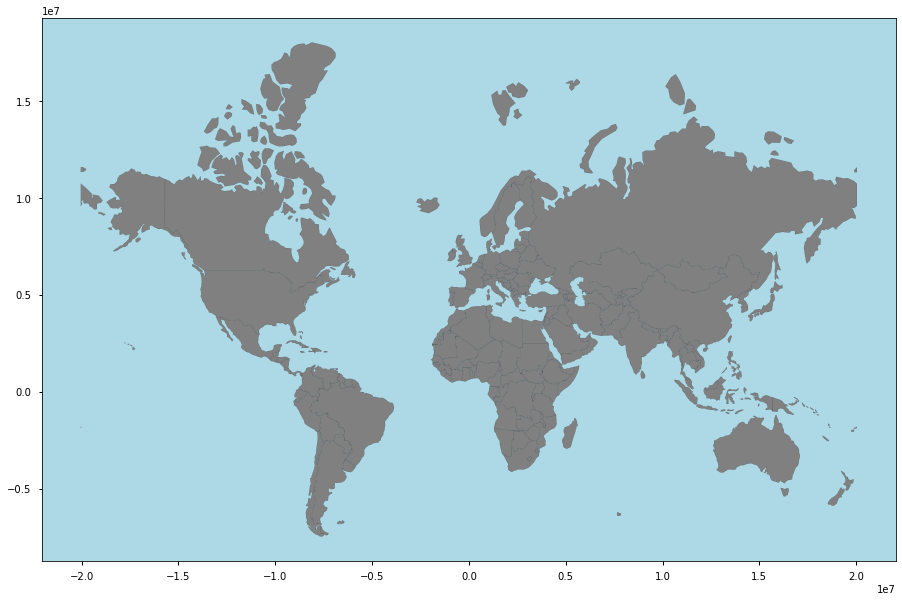

In [10]:
# Plot basemap
base = world.plot(color='grey', figsize=(17,10), edgecolor='black', linewidth=0.1)

In [13]:
# Plot choropleth map over the basemap
table.plot(ax=base, column='death_per_1mil', cmap='inferno_r',
           legend=True, edgecolor='black',linewidth=.2,
           legend_kwds={'location': 'top','spacing':'proportional',
                        'shrink': .65, 'pad': -0.1,
                     'aspect':50, 'extend':'both'})

<AxesSubplot:>

<Figure size 576x396 with 0 Axes>

In [14]:
plt.show()